In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 보스턴 주택 가격 데이터 셋
from keras.datasets import boston_housing
(train_data,train_labels), (test_data, test_labels) = boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
mean = train_data.mean(axis=0)  #평균값으로 데이터를 스케일링(추가)  axis 0 은 행과 렬중 렬을 말함 렬을 기준으로 평균을 구하는거

In [7]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [9]:
train_data = train_data - mean
#train -= mean    위하고 아래는 같음

In [10]:
#표준편차 구하기
std = train_data.std(axis=0)

In [11]:
train_data = train_data / std
train_data

array([[ -0.67803164,  -0.96723094,  -2.06807658, ...,  -7.2586309 ,
         -3.32642867,  -0.93321053],
       [ -0.80921182,   2.50816872,  -2.96622659, ..., -10.12532043,
         -3.34259981,  -3.08763312],
       [ -0.28084511,  -0.96723094,  -0.60398918, ...,  -7.62265497,
         -3.55388854,  -3.06693079],
       ...,
       [ -0.80781518,   0.50718104,  -2.37382978, ...,  -9.12425424,
         -3.69506686,  -2.43619977],
       [ -0.57870548,  -0.96723094,  -0.38643402, ..., -10.12532043,
         -4.76214942,  -1.33759606],
       [ -0.81001145,   1.56033245,  -2.83392953, ...,  -9.71579335,
         -3.54133462,  -2.91235338]])

In [12]:
mean = test_data.mean(axis=0)
test_data -= mean
std = test_data.std(axis=0)
test_data /- std

test_data

array([[ 1.49922642e+01, -1.09019608e+01,  6.83509804e+00, ...,
         1.82549020e+00, -3.36913333e+02,  1.67445098e+01],
       [-2.96904578e+00, -1.09019608e+01, -1.25490196e+00, ...,
        -5.74509804e-01,  3.07866667e+01,  3.90450980e+00],
       [-3.03736578e+00, -1.09019608e+01, -6.07490196e+00, ...,
         1.82549020e+00,  3.27366667e+01, -2.56549020e+00],
       ...,
       [-1.25856578e+00, -1.09019608e+01,  8.31509804e+00, ...,
        -3.67450980e+00,  2.54466667e+01, -1.03854902e+01],
       [-2.73424578e+00, -1.09019608e+01, -5.06490196e+00, ...,
        -9.74509804e-01,  2.75366667e+01, -2.59549020e+00],
       [-1.68335784e-01, -1.09019608e+01,  8.31509804e+00, ...,
        -3.67450980e+00, -1.24003333e+02, -2.49549020e+00]])

In [14]:
# 신경망을 만든다. 
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],))) #input 숫자를 그냥 데이터에 맞춰서 넣음
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    #mse는 제곱오차    mae는 절대평균오차
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

In [30]:
#k-folder 검증
k = 4

num_val_samples = len(train_data) // k  #나머지 버림
all_scores = []

for i in range(k):
    print('처리중인 폴더 #',i)
    
    #검증테이터를 준비: k번째 분할
    val_data = train_data[i+num_val_samples: (i+1)*num_val_samples]
    val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  # 훈련데이터의 준비
    partial_train_data = np.concatenate([
    train_data[:i*num_val_samples],
    train_data[(i+1)*num_val_samples:]], axis = 0)
    
    partial_train_labels = np.concatenate([
    train_labels[:i*num_val_samples],
    train_labels[(i+1)*num_val_samples:]], axis = 0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_labels, epochs =20, batch_size=1)
    
    val_mse, val_mae = model.evaluate(val_data, val_labels)
    all_score.append(val_mae)
    
    
    print(i,(i+1)*num_val_samples)

처리중인 폴더 # 0
Epoch 1/20
303/303 [==============================] - 1s 308us/step - loss: 174.8588 - mae: 9.1067
Epoch 2/20
303/303 [==============================] - 0s 302us/step - loss: 55.2607 - mae: 4.9467
Epoch 3/20
303/303 [==============================] - 0s 308us/step - loss: 40.1277 - mae: 4.1444
Epoch 4/20
303/303 [==============================] - 0s 305us/step - loss: 34.8920 - mae: 3.9036
Epoch 5/20
303/303 [==============================] - 0s 295us/step - loss: 28.3995 - mae: 3.8986
Epoch 6/20
303/303 [==============================] - 0s 302us/step - loss: 29.4021 - mae: 3.4479
Epoch 7/20
303/303 [==============================] - 0s 302us/step - loss: 24.7819 - mae: 3.4442
Epoch 8/20
303/303 [==============================] - 0s 305us/step - loss: 25.2459 - mae: 3.5178
Epoch 9/20
303/303 [==============================] - 0s 298us/step - loss: 17.3994 - mae: 2.9113
Epoch 10/20
303/303 [==============================] - 0s 295us/step - loss: 18.4864 - mae: 3.1528
Epoch 

ValueError: Data cardinality is ambiguous:
  x sizes: 0
  y sizes: 101
Make sure all arrays contain the same number of samples.

In [31]:
# K-folder 검증
k = 4

num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #',i)

  # 검증 데이터를 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  # 훈련 데이터의 준비:
  partial_train_data = np.concatenate(
    [train_data[: i * num_val_samples],
    train_data[(i+1)*num_val_samples:]], axis=0)
  
  partial_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  model.fit(partial_train_data,
            partial_train_labels,
            epochs=20,
            batch_size=1,verbose=0) #verbose 넣으면 시스템 메세지를 안볼 수 있음
   
  val_mse, val_mae = model.evaluate(val_data, val_labels,verbpse=0)
  all_scores.append(val_mae)


처리중인 폴드 # 0
Epoch 1/20
303/303 [==============================] - 1s 305us/step - loss: 143.0937 - mae: 8.3314
Epoch 2/20
303/303 [==============================] - 0s 315us/step - loss: 53.9075 - mae: 5.0419
Epoch 3/20
303/303 [==============================] - 0s 314us/step - loss: 35.3898 - mae: 3.9354
Epoch 4/20
303/303 [==============================] - 0s 305us/step - loss: 29.4034 - mae: 3.8494
Epoch 5/20
303/303 [==============================] - 0s 305us/step - loss: 28.2600 - mae: 3.5563
Epoch 6/20
303/303 [==============================] - 0s 312us/step - loss: 26.5032 - mae: 3.6479
Epoch 7/20
303/303 [==============================] - 0s 315us/step - loss: 23.4040 - mae: 3.3670
Epoch 8/20
303/303 [==============================] - 0s 308us/step - loss: 21.2454 - mae: 3.2507
Epoch 9/20
303/303 [==============================] - 0s 308us/step - loss: 15.0110 - mae: 2.8550
Epoch 10/20
303/303 [==============================] - 0s 302us/step - loss: 18.2102 - mae: 3.0828
Epoch 

4/4 [==============================] - 0s 334us/step - loss: 26.5212 - mae: 2.9932


In [32]:
# K-folder 검증
k = 4
num_epochs =500


num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #',i)

  # 검증 데이터를 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  # 훈련 데이터의 준비:
  partial_train_data = np.concatenate(
    [train_data[: i * num_val_samples],
    train_data[(i+1)*num_val_samples:]], axis=0)
  
  partial_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  history = model.fit(partial_train_data,
            partial_train_labels,
            epochs=num_epochs,
            batch_size=1,validation_data = (val_data,val_labels),verbose=0) #verbose 넣으면 시스템 메세지를 안볼 수 있음
  mae_history = history.history['mae'] 
  all_scores.append(mae_history)


처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [36]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

Text(0, 0.5, 'validation MAE')

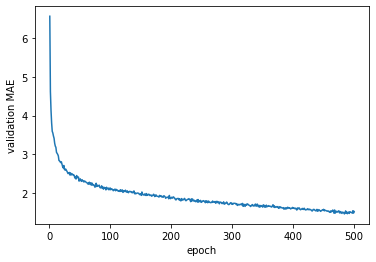

In [40]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('epoch')
plt.ylabel('validation MAE')